In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading dataset

df=pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.shape

(47692, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [6]:
df["cyberbullying_type"].value_counts(ascending=False)

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

Text(0.5, 1.0, 'Cyberbullying Type')

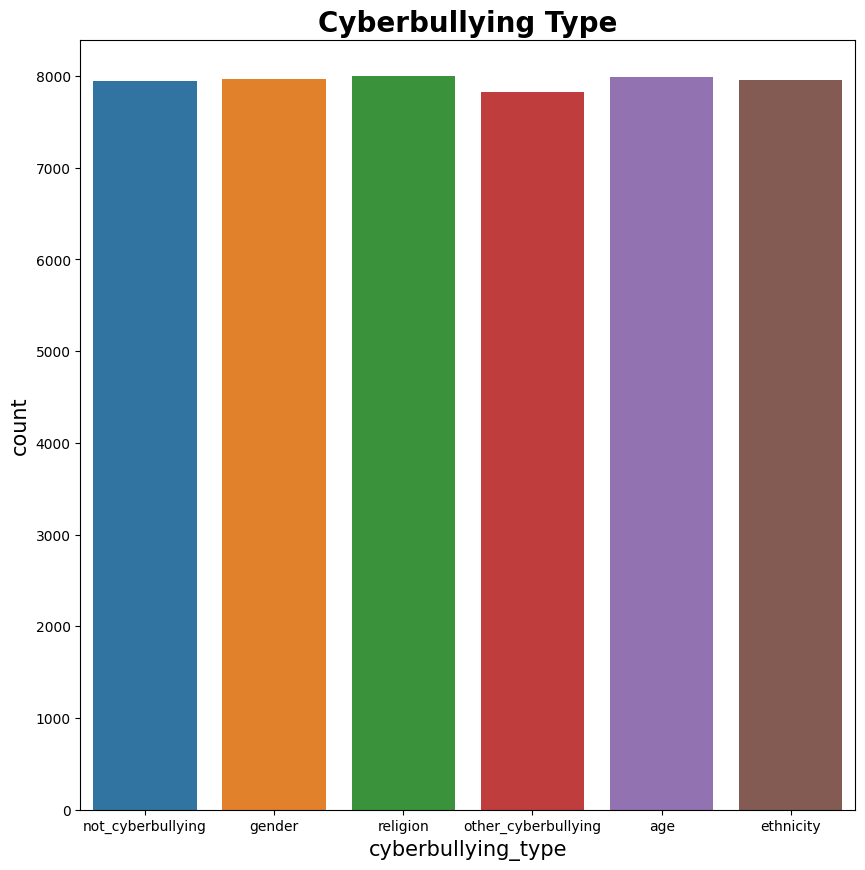

In [7]:
plt.figure(figsize=(10,10))
plt.xlabel("Type",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(x="cyberbullying_type",data=df).set_title('Cyberbullying Type',fontsize=20, fontdict={"weight": "bold"})


In [8]:
df["cyberbullying_type"]=df["cyberbullying_type"].astype("category")
df["cyberbullying_type"].dtypes

CategoricalDtype(categories=['age', 'ethnicity', 'gender', 'not_cyberbullying',
                  'other_cyberbullying', 'religion'],
, ordered=False)

In [9]:
df["cyberbullying_type"]=df["cyberbullying_type"].cat.codes

In [10]:
#Data preprocessing

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    


In [11]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
tfidf_v.get_feature_names()[:20]

/home/asif/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aalwuhaib',
 'ab',
 'abandon',
 'abc',
 'abil',
 'abl',
 'abort',
 'absolut',
 'abt',
 'abu',
 'abus',
 'abus bulli',
 'acc',
 'accept',
 'access',
 'accident',
 'accomplish',
 'accord',
 'account',
 'acct']

In [14]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [15]:
y=df['cyberbullying_type']

In [16]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [18]:
count_df.head()

,aalwuhaib,ab,abandon,abc,abil,abl,abort,absolut,abt,abu,...,yr old,yu,yup,zaibatsunew,zapp,zapp fuck,zapp fuck dumb,zero,zionist,zxbzv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score=accuracy_score(y_test,y_pred) #Accuracy = TP+TN/TP+FP+FN+TN
score=score*100

print('Accuracy of the model is {0:.2f}%'.format(score))

Accuracy of the model is 78.61%


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1603
           1       0.91      0.91      0.91      1603
           2       0.83      0.78      0.81      1531
           3       0.65      0.46      0.54      1624
           4       0.61      0.65      0.63      1612
           5       0.83      0.97      0.89      1566

    accuracy                           0.79      9539
   macro avg       0.78      0.79      0.78      9539
weighted avg       0.78      0.79      0.78      9539



Text(95.5815972222222, 0.5, 'Actual Label')

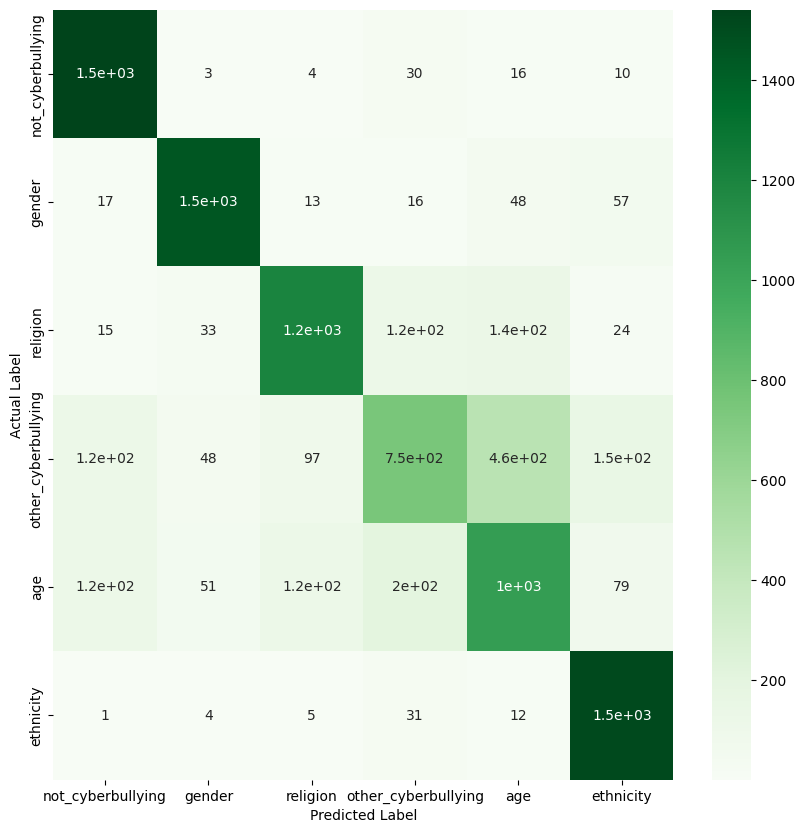

In [22]:
plt.figure(figsize=(10,10))

x_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']
y_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']

confusion_m=confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# passive aggresive

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

pac.fit(X_train, y_train)
y_pred_passive = pac.predict(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred_passive)
accuracy=accuracy*100

print('Accuracy of the model is {0:.2f}%'.format(accuracy))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10,10))

x_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']
y_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']

confusion_m=confusion_matrix(y_test,y_pred_passive)

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# svm

In [ ]:
from sklearn.svm import LinearSVC as svc

svm_model = svc().fit(X_train, y_train)
y_pred_svc=svm_model.predict(X_test)

In [ ]:

accuracy_svc= accuracy_score(y_test, y_pred_svc)
accuracy_svc=accuracy_svc*100

print('Accuracy of the model is {0:.2f}%'.format(accuracy_svc))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10,10))

x_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']
y_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']

confusion_m=confusion_matrix(y_test,y_pred_svc)

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
import pickle
filename = 'pickle.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

In [ ]:
pickle.dump(tfidf_v, open('tranform.pkl', 'wb'))